In [1]:
import numpy as np
import pylab as plt
import hashlib
from classifier_utils import cnn_model, preprocess_img, reduce_palette, change_pixel_values, get_class
from skimage import io, img_as_float
import glob
import os
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
IMG_SIZE = 48
NUM_CLASSES = 10
root_dir = 'train_set'

In [4]:
all_img_paths = glob.glob(os.path.join(root_dir, '*/*.ppm'))

In [5]:
NUM_EXAMPLES = len(all_img_paths)
X = np.zeros((NUM_EXAMPLES, IMG_SIZE, IMG_SIZE, 3),dtype='uint8')
Y = np.zeros((NUM_EXAMPLES, NUM_CLASSES),dtype='uint8')

In [6]:
index = 0

for img_path in all_img_paths:
    img = preprocess_img(IMG_SIZE,io.imread(img_path))
    label = get_class(img_path)
    X[index] = img
    Y[index] = np.eye(NUM_CLASSES, dtype='uint8')[label]
    index = index + 1

/Users/pawelmorawiecki/tensorflow/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/pawelmorawiecki/tensorflow/lib/python2.7/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


10 example images, each from one category:

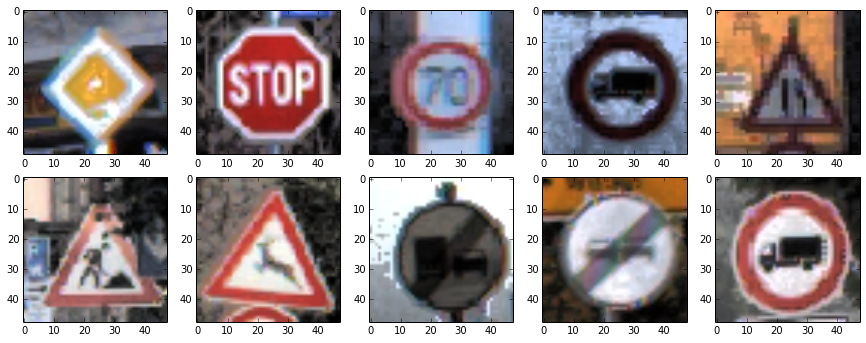

In [83]:
fig = plt.figure(figsize=(15,11))
fig.add_subplot(1,5,1)
plt.imshow(X[2000])
a = fig.add_subplot(1,5,2)
plt.imshow(X[2500])
fig.add_subplot(1,5,3)
plt.imshow(X[3500])
fig.add_subplot(1,5,4)
plt.imshow(X[5000])
fig.add_subplot(1,5,5)
plt.imshow(X[5500])
fig.add_subplot(2,5,6)
plt.imshow(X[6000])
fig.add_subplot(2,5,7)
plt.imshow(X[7700])
fig.add_subplot(2,5,8)
plt.imshow(X[8150])
fig.add_subplot(2,5,9)
plt.imshow(X[8300])
fig.add_subplot(2,5,10)
plt.imshow(X[4900])

Now let's reduce palette to 4 colours

In [7]:
X_fewer_colours = reduce_palette(X)

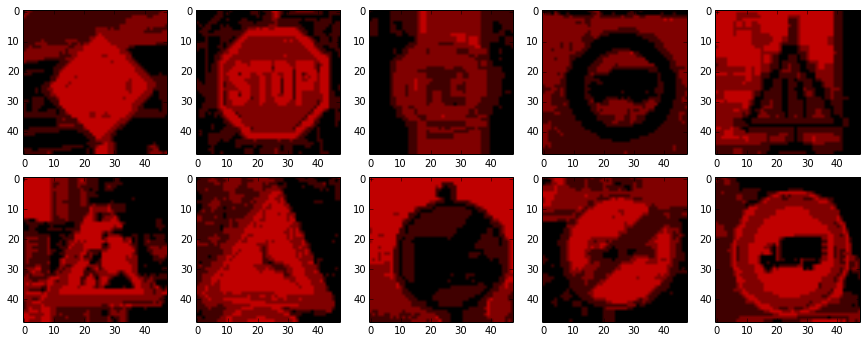

In [84]:
fig = plt.figure(figsize=(15,11))
fig.add_subplot(1,5,1)
plt.imshow(X_fewer_colours[2000])
a = fig.add_subplot(1,5,2)
plt.imshow(X_fewer_colours[2500])
fig.add_subplot(1,5,3)
plt.imshow(X_fewer_colours[3500])
fig.add_subplot(1,5,4)
plt.imshow(X_fewer_colours[5000])
fig.add_subplot(1,5,5)
plt.imshow(X_fewer_colours[5500])
fig.add_subplot(2,5,6)
plt.imshow(X_fewer_colours[6000])
fig.add_subplot(2,5,7)
plt.imshow(X_fewer_colours[7700])
fig.add_subplot(2,5,8)
plt.imshow(X_fewer_colours[8150])
fig.add_subplot(2,5,9)
plt.imshow(X_fewer_colours[8300])
fig.add_subplot(2,5,10)
plt.imshow(X_fewer_colours[4900])

Change colours to pseudo-random values. In a given image the same colour is mapped to the same pseudo-random value. (it takes a few minutes to process all pictures)

In [8]:
X_random_colours = np.zeros((NUM_EXAMPLES, IMG_SIZE, IMG_SIZE, 3),dtype='uint8')
for i in range(0,NUM_EXAMPLES):
    prefix = hashlib.sha256(X_fewer_colours[i]).hexdigest() #hash is calculated using all pixels in a given image
    X_random_colours[i] = change_pixel_values(IMG_SIZE, X_fewer_colours[i], prefix)

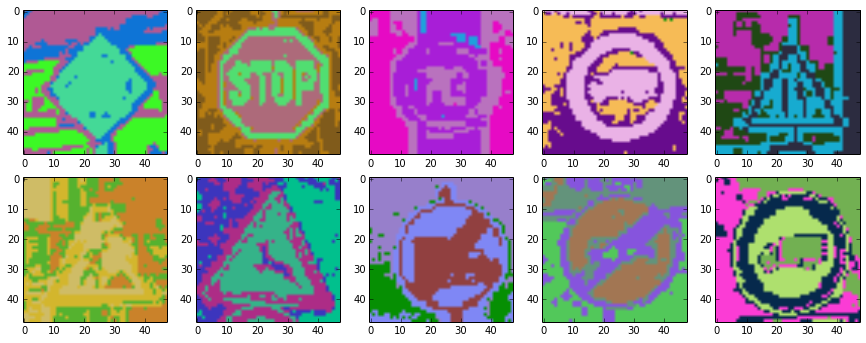

In [85]:
fig = plt.figure(figsize=(15,11))
fig.add_subplot(1,5,1)
plt.imshow(X_random_colours[2000])
a = fig.add_subplot(1,5,2)
plt.imshow(X_random_colours[2500])
fig.add_subplot(1,5,3)
plt.imshow(X_random_colours[3500])
fig.add_subplot(1,5,4)
plt.imshow(X_random_colours[5000])
fig.add_subplot(1,5,5)
plt.imshow(X_random_colours[5500])
fig.add_subplot(2,5,6)
plt.imshow(X_random_colours[6000])
fig.add_subplot(2,5,7)
plt.imshow(X_random_colours[7700])
fig.add_subplot(2,5,8)
plt.imshow(X_random_colours[8150])
fig.add_subplot(2,5,9)
plt.imshow(X_random_colours[8300])
fig.add_subplot(2,5,10)
plt.imshow(X_random_colours[4900])

Change pixel values to float64 (between 0 and 1)

In [9]:
X_float = np.zeros((NUM_EXAMPLES, IMG_SIZE, IMG_SIZE, 3))
for i in xrange(0,NUM_EXAMPLES):
    X_float[i] = img_as_float(X_random_colours[i])

# Training

In [11]:
model = cnn_model(IMG_SIZE,NUM_CLASSES)

In [12]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.fit(X_float, Y, batch_size=64, epochs=6)

Epoch 1/2
8520/8520 [==============================] - 88s - loss: 0.1393 - acc: 0.9526    
Epoch 2/2
8520/8520 [==============================] - 91s - loss: 0.1083 - acc: 0.9617    


# Evaluation on the test set

In [15]:
root_dir = 'test_set'

all_img_paths = glob.glob(os.path.join(root_dir, '*/*.ppm'))

NUM_EXAMPLES = len(all_img_paths)
X_test = np.zeros((NUM_EXAMPLES, IMG_SIZE, IMG_SIZE, 3),dtype='uint8')
Y_test = np.zeros((NUM_EXAMPLES, NUM_CLASSES),dtype='uint8')

In [16]:
index = 0

for img_path in all_img_paths:
    img = preprocess_img(IMG_SIZE,io.imread(img_path))
    label = get_class(img_path)
    X_test[index] = img
    Y_test[index] = np.eye(NUM_CLASSES, dtype='uint8')[label]
    index = index + 1

In [17]:
X_test_fewer_colours = reduce_palette(X_test)

In [18]:
X_test_random_colours = np.zeros((NUM_EXAMPLES, IMG_SIZE, IMG_SIZE, 3),dtype='uint8')
for i in range(0,NUM_EXAMPLES):
    prefix = hashlib.sha256(X_test_fewer_colours[i]).hexdigest() #hash is calculated using all pixels in a given image
    X_test_random_colours[i] = change_pixel_values(IMG_SIZE, X_test_fewer_colours[i], prefix)

In [19]:
X_test_float = np.zeros((NUM_EXAMPLES, IMG_SIZE, IMG_SIZE, 3))
for i in xrange(0,NUM_EXAMPLES):
    X_test_float[i] = img_as_float(X_test_random_colours[i])

In [25]:
model.evaluate(X_test_float, Y_test, batch_size=32)

2816/2820 [============================>.] - ETA: 0s

[0.21503873352252001, 0.93262411347517726]